In [18]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
import torch.nn.functional as F
def compute_correlation_matrix(model, tokenizer, text):
    model = model.eval()
    token_list = text.strip('\n').split()
    input_ids = torch.LongTensor(tokenizer.convert_tokens_to_ids(token_list)).view(1,-1)
    _, seq_len = input_ids.size()
    hidden = model(input_ids).last_hidden_state
    #print (hidden.size())
    norm_hidden = hidden / hidden.norm(dim=2, keepdim=True)
    correlation_matrix = torch.matmul(norm_hidden, norm_hidden.transpose(1,2)).view(seq_len, seq_len)
    correlation_matrix = F.softmax(correlation_matrix, dim=-1)
    #print (correlation_matrix.size())
    return correlation_matrix.detach().numpy()

In [3]:
def plot_heatmap(matrix, text):
    token_list = text.strip('\n').split()
    x_ticks = token_list
    y_ticks = token_list
    
    fig, ax = plt.subplots()
    im = ax.imshow(matrix)

    ax.set_xticks(np.arange(len(x_ticks)))
    ax.set_yticks(np.arange(len(x_ticks)))
    ax.set_xticklabels(x_ticks)
    ax.set_yticklabels(x_ticks)

    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    fig.tight_layout()
    plt.show()

In [4]:
def visualize_instance(model, tokenizer, text):
    text = '[CLS] ' + text + ' [SEP]'
    correlation_matrix = compute_correlation_matrix(model, tokenizer, text)
    plot_heatmap(correlation_matrix, text)

# load sampled wiki sentences

In [5]:
in_f = r'./chinese_wiki_500_lines.txt'
with open(in_f, 'r', encoding = 'utf8') as i:
    lines = i.readlines()

In [8]:
from transformers import BertModel, BertTokenizer

# load bert base model

In [9]:
model_name = 'bert-base-chinese'
bert_model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

# load clbert model

In [11]:
model_name = 'cambridgeltl/clbert-base-chinese'
clbert_model = BertModel.from_pretrained(model_name)
cl_tokenizer = BertTokenizer.from_pretrained(model_name)

# select a text

In [22]:
idx = 12
text = lines[idx].strip('\n')
print (text)

西 方 语 言 中 “ 数 学 ” （ ） 一 词 源 自 于 古 希 腊 语 的 （ ） ， 其 有 “ 学 习 ” 、 “ 学 问 ” 、 “ 科 学 ” ， 以 及 另 外 还 有 个 较 狭 义 且 技 术 性 的 意 思 － 「 数 学 研 究 」 ， 即 使 在 其 语 源 内 。


# bert base model result

/Users/suyixuan/.virtualenvs/py3torcht5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/suyixuan/.virtualenvs/py3torcht5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/suyixuan/.virtualenvs/py3torcht5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 35821 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/suyixuan/.virtualenvs/py3torcht5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 35328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/suyixuan/.virtualenvs/py3torcht5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)


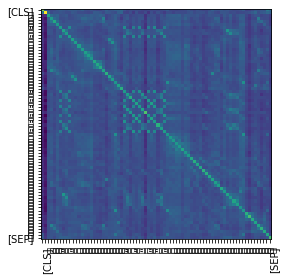

In [23]:
visualize_instance(bert_model, tokenizer, text)

# clbert base model result

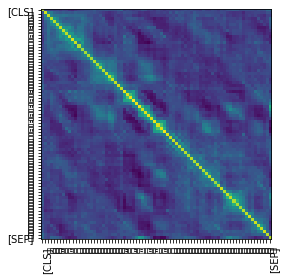

In [24]:
visualize_instance(clbert_model, cl_tokenizer, text)